# Small Neural Network tutorial: 
Needed packages torch, torchvision   
                           SMA May 2023  
                           First part it's from pytorch tutorial: https://pytorch.org/tutorials/  
                           There's more information about NN in:  https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

In [1]:
import torch
import numpy as np

The advantage of pytorch is that it uses tensors, that's one of the main features that makes it powerful for ML

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data) #We can create a tensor from numpy and also a numpy array from pytorch
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [3]:
print(x_data[0])

tensor([1, 2])


In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data (the size)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.2349, 0.4355],
        [0.0241, 0.0995]]) 



In [5]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2438, 0.9328, 0.8681],
        [0.2000, 0.4494, 0.5788]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [6]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [7]:
t1 = torch.cat([tensor, tensor, tensor], dim=1) #Joins tensors
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [8]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n") #It can calculate the transpose matrix and do normal multiplication
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [9]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)


tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [10]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

/Users/susy/Library/Python/3.8/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/susy/Library/Python/3.8/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
prediction = model(data) # forward pass

In [12]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

In [13]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [14]:
optim.step() #gradient descent

### Neural Network

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or weights)

- Iterate over a dataset of inputs

- Process input through the network

- Compute the loss (how far is the output from being correct)

- Propagate gradients back into the network’s parameters

- Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient

From: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

In [15]:
import torch
import torch.nn as nn #This is the package from torch to create neural networks
import torch.nn.functional as F

This one is for image recognition

In [16]:
class Net(nn.Module):

    def __init__(self): #This is for defining the inputs
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x): #You have to define how to go forward 
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) #It is using relu
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [17]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


In [18]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0622, -0.0773,  0.0653, -0.1199, -0.0083, -0.0739,  0.0103, -0.0038,
          0.0359, -0.0386]], grad_fn=<AddmmBackward0>)


In [19]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [20]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.4189, grad_fn=<MseLossBackward0>)


In [21]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0209, -0.0007,  0.0105, -0.0159,  0.0131,  0.0060])


In [22]:
import torch.optim as optim


# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

### Building a NN with python

99 1272.3420090618083
199 852.2456710777584
299 572.1426594276904
399 385.28493692350696
499 260.5649991884155
599 177.27287483426684
699 121.61492942787052
799 84.39994749091586
899 59.50057863748438
999 42.82997109942102
1099 31.66082635696483
1199 24.17212054665816
1299 19.1472485907673
1399 15.77291796283069
1499 13.505102855977908
1599 11.97965320019028
1699 10.952651889032483
1799 10.260598827800399
1899 9.793815731933478
1999 9.478671175360724
2099 9.265693246285492
2199 9.12161445788611
2299 9.024044513703972
2399 8.957900309307373
2499 8.913011753324607
2599 8.882514897808768
2699 8.861772611022925
2799 8.847648994600423
2899 8.838021186588998
2999 8.831450593174676
3099 8.826961281510354
3199 8.823890463355546
3299 8.82178751955379
3399 8.820345738355572
3499 8.819356121839188
3599 8.818676093446136
3699 8.818208277249578
3799 8.81788609168736
3899 8.81766395871422
3999 8.817510642285018
4099 8.817404710869956
4199 8.817331443238448
4299 8.817280716027659
4399 8.8172455599223

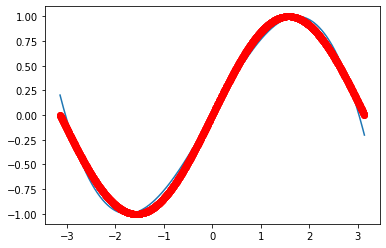

In [23]:
import numpy as mp
import math
import matplotlib.pyplot as plt

x=np.linspace(-math.pi, math.pi, 2000)
y=np.sin(x)

a=np.random.randn()
b=np.random.randn()
c=np.random.randn()
d=np.random.randn()

learning_rate=1e-6
for t in range(20000):
    y_pred=a+b*x+c*x**2+d*x**3
    loss=np.square(y_pred-y).sum()
    if t%100==99:
       print(t,loss)
    # Now I need to train the model by calculating gradients
    grad_y_pred=2.0*(y_pred-y)
    grad_a=grad_y_pred.sum()
    grad_b=(grad_y_pred*x).sum()
    grad_c=(grad_y_pred*x**2).sum()
    grad_d=(grad_y_pred*x**3).sum()
    
    #Update my weights
    a -= learning_rate*grad_a
    b -= learning_rate*grad_b
    c -= learning_rate*grad_c
    d -= learning_rate*grad_d
    
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
res=a=+b*x+c*x**2+d*x**3
fig=plt.figure
print(res)
plt.plot(x,res)
plt.plot(x,y, 'or')
plt.show()

Using pytorch: tensors and autograd

99 <built-in method item of Tensor object at 0x16a751270>
199 <built-in method item of Tensor object at 0x11fd5eae0>
299 <built-in method item of Tensor object at 0x16a5022c0>
399 <built-in method item of Tensor object at 0x16a751270>
499 <built-in method item of Tensor object at 0x11fd5eae0>
599 <built-in method item of Tensor object at 0x16a5022c0>
699 <built-in method item of Tensor object at 0x16a751270>
799 <built-in method item of Tensor object at 0x11fd5eae0>
899 <built-in method item of Tensor object at 0x16a5022c0>
999 <built-in method item of Tensor object at 0x16a751270>
1099 <built-in method item of Tensor object at 0x11fd5eae0>
1199 <built-in method item of Tensor object at 0x16a5022c0>
1299 <built-in method item of Tensor object at 0x16a751270>
1399 <built-in method item of Tensor object at 0x11fd5eae0>
1499 <built-in method item of Tensor object at 0x16a572090>
1599 <built-in method item of Tensor object at 0x11fd5eae0>
1699 <built-in method item of Tensor object at 0x16

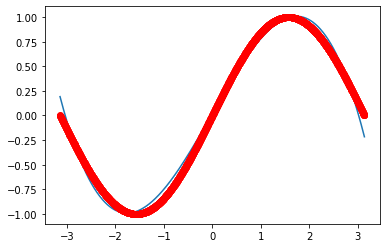

In [24]:
#Now with pytorch
import torch
import math

dtype=torch.float
device=torch.device("cpu")

x=torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y=torch.sin(x)

a=torch.randn((),device=device, dtype=dtype, requires_grad=True)
b=torch.randn((),device=device, dtype=dtype, requires_grad=True)
c=torch.randn((),device=device, dtype=dtype, requires_grad=True)
d=torch.randn((),device=device, dtype=dtype, requires_grad=True)

learning_rate=1e-6
for t in range(2000):
    y_pred=a+b*x+c*x**2+d*x**3
    loss=(y_pred-y).pow(2).sum()
    if t % 100==99:
        print(t,loss.item)
    #Here I Use pytorch for the gradients instead of doing them by hand
    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()
    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
print(f'Resultpr: y = {a} + {b} x + {c} x^2 + {d} x^3')
print(a)
x_n=np.array(x)

res=a.detach().numpy()+b.detach().numpy()*x_n+c.detach().numpy()*x_n**2+d.detach().numpy()*x_n**3

print(res)
fig=plt.figure
print(res)
plt.plot(x,res)
plt.plot(x,y, 'or')
plt.show()
    
    

Using pytorch to define new functions in this case $y=a+bP_3(c+dx)$ where $P_3(x)=\frac{1}{2}(5x^3-3x)$, and computing with an optimizer

99 321.80645751953125
199 305.1796875
299 299.9991455078125
399 296.9933776855469
499 294.52764892578125
599 292.2206115722656
699 289.97161865234375
799 287.7520751953125
899 285.55340576171875
999 283.3739929199219
1099 281.2120666503906
1199 279.0675354003906
1299 276.94049072265625
1399 274.83001708984375
1499 272.7371826171875
1599 270.66046142578125
1699 268.60113525390625
1799 266.55767822265625
1899 264.5310974121094
1999 262.52032470703125
2099 260.52606201171875
2199 258.5473327636719
2299 256.5848388671875
2399 254.6376495361328
2499 252.70651245117188
2599 250.79031372070312
2699 248.88998413085938
2799 247.004150390625
2899 245.13421630859375
2999 243.27850341796875
3099 241.43814086914062
3199 239.6121368408203
3299 237.80084228515625
3399 236.0040740966797
3499 234.22128295898438
3599 232.45326232910156
3699 230.6987762451172
3799 228.95875549316406
3899 227.23239135742188
3999 225.51951599121094
4099 223.8208770751953
4199 222.13525390625
4299 220.46328735351562
4399 21

34599 28.780576705932617
34699 28.626632690429688
34799 28.47327995300293
34899 28.32180404663086
34999 28.171104431152344
35099 28.021526336669922
35199 27.873445510864258
35299 27.725934982299805
35399 27.58022689819336
35499 27.435293197631836
35599 27.291353225708008
35699 27.14896583557129
35799 27.007129669189453
35899 26.866863250732422
35999 26.72753143310547
36099 26.588911056518555
36199 26.452056884765625
36299 26.315731048583984
36399 26.180614471435547
36499 26.046722412109375
36599 25.913352966308594
36699 25.781648635864258
36799 25.65066909790039
36899 25.52042007446289
36999 25.39181137084961
37099 25.263702392578125
37199 25.136688232421875
37299 25.010913848876953
37399 24.885618209838867
37499 24.761737823486328
37599 24.638736724853516
37699 24.51620864868164
37799 24.395397186279297
37899 24.275123596191406
37999 24.155487060546875
38099 24.037445068359375
38199 23.91985511779785
38299 23.803112030029297
38399 23.68771743774414
38499 23.572769165039062
38599 23.45

68299 10.288444519042969
68399 10.27720832824707
68499 10.266014099121094
68599 10.254861831665039
68699 10.243754386901855
68799 10.232690811157227
68899 10.22166919708252
68999 10.210691452026367
69099 10.199756622314453
69199 10.188863754272461
69299 10.178014755249023
69399 10.167208671569824
69499 10.156484603881836
69599 10.146527290344238
69699 10.136609077453613
69799 10.126730918884277
69899 10.1168851852417
69999 10.107077598571777
70099 10.097310066223145
70199 10.087575912475586
70299 10.07787799835205
70399 10.068222045898438
70499 10.058600425720215
70599 10.049016952514648
70699 10.039469718933105
70799 10.029959678649902
70899 10.020486831665039
70999 10.011051177978516
71099 10.001653671264648
71199 9.992292404174805
71299 9.982969284057617
71399 9.973681449890137
71499 9.964544296264648
71599 9.956039428710938
71699 9.947565078735352
71799 9.939123153686523
71899 9.930712699890137
71999 9.922333717346191
72099 9.91398811340332
72199 9.905670166015625
72299 9.897386550

102599 8.921636581420898
102699 8.92077922821045
102799 8.919928550720215
102899 8.91908073425293
102999 8.918235778808594
103099 8.917394638061523
103199 8.916557312011719
103299 8.915722846984863
103399 8.91489315032959
103499 8.914064407348633
103599 8.91324234008789
103699 8.912422180175781
103799 8.911605834960938
103899 8.910794258117676
103999 8.909982681274414
104099 8.90917682647705
104199 8.908376693725586
104299 8.907575607299805
104399 8.906909942626953
104499 8.906315803527832
104599 8.905721664428711
104699 8.905131340026855
104799 8.904542922973633
104899 8.90395736694336
104999 8.903373718261719
105099 8.902788162231445
105199 8.90220832824707
105299 8.901628494262695
105399 8.901052474975586
105499 8.900480270385742
105599 8.899904251098633
105699 8.899335861206055
105799 8.898764610290527
105899 8.898198127746582
105999 8.89763355255127
106099 8.897069931030273
106199 8.896510124206543
106299 8.895950317382812
106399 8.895393371582031
106499 8.8948392868042
106599 8.8

136299 8.826047897338867
136399 8.825984954833984
136499 8.825922012329102
136599 8.825860977172852
136699 8.825800895690918
136799 8.825738906860352
136899 8.825677871704102
136999 8.825616836547852
137099 8.825555801391602
137199 8.825494766235352
137299 8.825435638427734
137399 8.8253755569458
137499 8.825313568115234
137599 8.82525634765625
137699 8.8251953125
137799 8.8251371383667
137899 8.825078010559082
137999 8.825019836425781
138099 8.824958801269531
138199 8.82490062713623
138299 8.82484245300293
138399 8.824784278869629
138499 8.824728012084961
138599 8.82466983795166
138699 8.82461166381836
138799 8.824554443359375
138899 8.824499130249023
138999 8.824441909790039
139099 8.824386596679688
139199 8.824329376220703
139299 8.824274063110352
139399 8.82421875
139499 8.824163436889648
139599 8.824108123779297
139699 8.824052810668945
139799 8.823996543884277
139899 8.823942184448242
139999 8.823888778686523
140099 8.823834419250488
140199 8.82377815246582
140299 8.8237257003784

170499 8.819010734558105
170599 8.819010734558105
170699 8.819010734558105
170799 8.819010734558105
170899 8.819010734558105
170999 8.819010734558105
171099 8.819010734558105
171199 8.819010734558105
171299 8.819010734558105
171399 8.819010734558105
171499 8.819010734558105
171599 8.819010734558105
171699 8.819010734558105
171799 8.819010734558105
171899 8.819010734558105
171999 8.819010734558105
172099 8.819010734558105
172199 8.819010734558105
172299 8.819010734558105
172399 8.819010734558105
172499 8.819010734558105
172599 8.819010734558105
172699 8.819010734558105
172799 8.819010734558105
172899 8.819010734558105
172999 8.819010734558105
173099 8.819010734558105
173199 8.819010734558105
173299 8.819010734558105
173399 8.819010734558105
173499 8.819010734558105
173599 8.819010734558105
173699 8.819010734558105
173799 8.819010734558105
173899 8.819010734558105
173999 8.819010734558105
174099 8.819010734558105
174199 8.819010734558105
174299 8.819010734558105
174399 8.819010734558105


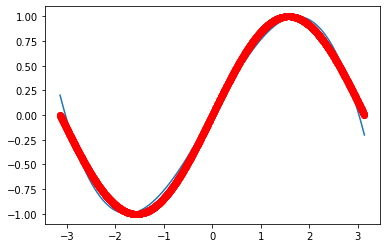

In [25]:
import torch
import math

#You can define classes: the main thing is that they need a forward and a backward functiont.
#Forward:Computes output Tensor from input
#Backward: Receives the gradient of the output
class LegendrePolynomial3(torch.autograd.Function):
    @staticmethod 
    def forward(ctx,input):
        #It recieves a Tensor with the input end return the output. 
        ctx.save_for_backward(input)
        return 0.5*(5*input**3-3*input)
    @staticmethod
    def backward(ctx, grad_output):
        #Here we recieve a tensor containing gradients of the loss with respect output, and it needs to compute the gradient of the loss with the input
        input,= ctx.saved_tensors
        return grad_output*1.5*(5*input**2-1)
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU


x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

#Create random tensor for weights
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-7
for t in range(200000):
    # To apply our Function, we use Function.apply method.
    P3 = LegendrePolynomial3.apply
    y_pred = a + b * P3(c + d * x)
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
     # Use autograd to compute the backward pass.
    loss.backward()
       # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')
x_n=np.array(x)
print(x_n)
#print(f'Resultpr: y = {a} + {b} x + {c} x^2 + {d} x^3')
#print(a)
x_n=np.array(x)
print(type(a.item()))
print(type(x_n))
res=a.item()+b.item()*0.5*(5*(c.item()+d.item()*x_n)**3-3*((c.item()+d.item()*x_n)))

#res=a.detach().numpy()+b.detach().numpy()*0.5*(5*c.detach().numpy()**3-3*c.detach().numpy()+d.detach().numpy()*x_n

print(res)
#fig=plt.figure
#print(res)
plt.plot(x,res)
plt.plot(x,y, 'or')
plt.show()
    
    
    
    

### Using neural networks from pytorch

In PyTorch, the nn package serves this same purpose. The nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. The nn package also defines a set of useful loss functions that are commonly used when training neural networks.

99 7527.03857421875
199 2426.2724609375
299 1128.72509765625
399 908.7431030273438
499 824.0941772460938
599 723.4213256835938
699 607.1493530273438
799 487.2972412109375
899 375.200927734375
999 277.197265625
1099 195.5359344482422
1199 130.44268798828125
1299 81.24075317382812
1399 46.735633850097656
1499 25.197126388549805
1599 14.101301193237305
1699 9.93702507019043
1799 8.955913543701172
1899 8.868108749389648
1999 8.896368980407715
Result: y = -3.368357283761725e-05 + 0.8563168048858643 x + -3.369809564901516e-05 x^2 + -0.09381653368473053 x^3


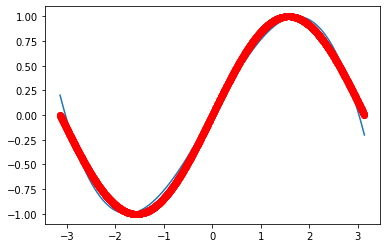

In [26]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model and loss function.
#The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential( #Helps to define layers
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

#print(res)
fig=plt.figure
#print(res)
plt.plot(x,res)
plt.plot(x,y, 'or')
plt.show()
    
    
    

## Random Information

In [27]:
#import Libraries/
import torch
import torch.nn as nn
import numpy as np
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [73, 67, 43], 
                   [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]], 
                  dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], 
                    [22, 37], [103, 119], [56, 70], 
                    [81, 101], [119, 133], [22, 37], 
                    [103, 119], [56, 70], [81, 101], 
                    [119, 133], [22, 37], [103, 119]], 
                   dtype='float32')
print(targets[0])
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(inputs[0])

[56. 70.]
tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([73., 67., 43.])


In [28]:
#Tensor Data set 
from torch.utils.data import TensorDataset
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]
#Data loader
from torch.utils.data import DataLoader
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [29]:
print(train_ds[0])

(tensor([73., 67., 43.]), tensor([56., 70.]))


In [30]:
# Define linear model
model = nn.Linear(3, 2) #torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
print(model.weight)
print(model.bias)
# Parameters
list(model.parameters())
# Define Loss
import torch.nn.functional as F
loss_fn = F.mse_loss
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

Parameter containing:
tensor([[ 0.3895,  0.3975,  0.5764],
        [-0.5523, -0.5094,  0.2955]], requires_grad=True)
Parameter containing:
tensor([-0.5670,  0.3845], requires_grad=True)


In [31]:
device=torch.device("cpu")

class LinearRegression(torch.nn.Module): #The thing in parenthesis is the parent from where you are inherencing 
    def __init__(self, inputSize, outputSize): #Initialize and passes variables
        super(LinearRegression, self).__init__() #Inherent the attribute from linearRegression
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [32]:
# Define model
model = LinearRegression(3, 2) # nn.Linear(in_features,out_features)
#model=nn.Linear(3,2)
print(list(model.parameters()))
#Define the loss function
loss_fun = nn.MSELoss()
# Define SGD optimizer with learning rate 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

[Parameter containing:
tensor([[ 0.0063,  0.0420, -0.0496],
        [-0.1465,  0.2139, -0.1523]], requires_grad=True), Parameter containing:
tensor([-0.4729,  0.0131], requires_grad=True)]


In [33]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
           #print(xb[0])
            #print(model)
            #print(xb)
            #print(yb)
            #print(xb.size(1))
            #print(xb.type())
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
#fit model for 1000 epochs
fit(10000, model, loss_fn , opt ,train_dl)
# Generate predictions
preds = model(inputs)
preds

Epoch [10/10000], Loss: 7098.4609
Epoch [20/10000], Loss: 7098.4619
Epoch [30/10000], Loss: 8997.5645
Epoch [40/10000], Loss: 11385.6338
Epoch [50/10000], Loss: 8742.9443
Epoch [60/10000], Loss: 8279.6562
Epoch [70/10000], Loss: 8279.6562
Epoch [80/10000], Loss: 7098.4619
Epoch [90/10000], Loss: 7363.5571
Epoch [100/10000], Loss: 9460.8516
Epoch [110/10000], Loss: 9913.6621
Epoch [120/10000], Loss: 10214.9160
Epoch [130/10000], Loss: 9659.0439
Epoch [140/10000], Loss: 10469.5332
Epoch [150/10000], Loss: 9913.6621
Epoch [160/10000], Loss: 7816.3687
Epoch [170/10000], Loss: 6807.6860
Epoch [180/10000], Loss: 8742.9434
Epoch [190/10000], Loss: 8279.6553
Epoch [200/10000], Loss: 11848.9209
Epoch [210/10000], Loss: 11385.6348
Epoch [220/10000], Loss: 7816.3687
Epoch [230/10000], Loss: 7260.4976
Epoch [240/10000], Loss: 9298.8154
Epoch [250/10000], Loss: 7363.5576
Epoch [260/10000], Loss: 6645.6499
Epoch [270/10000], Loss: 10469.5352
Epoch [280/10000], Loss: 9195.7559
Epoch [290/10000], Loss

Epoch [2520/10000], Loss: 5626.4907
Epoch [2530/10000], Loss: 7723.7861
Epoch [2540/10000], Loss: 7723.7852
Epoch [2550/10000], Loss: 9751.6270
Epoch [2560/10000], Loss: 8187.0728
Epoch [2570/10000], Loss: 8187.0728
Epoch [2580/10000], Loss: 5626.4912
Epoch [2590/10000], Loss: 8835.5273
Epoch [2600/10000], Loss: 8742.9434
Epoch [2610/10000], Loss: 9460.8516
Epoch [2620/10000], Loss: 5626.4912
Epoch [2630/10000], Loss: 3992.4839
Epoch [2640/10000], Loss: 7098.4619
Epoch [2650/10000], Loss: 5626.4912
Epoch [2660/10000], Loss: 6807.6851
Epoch [2670/10000], Loss: 6182.3618
Epoch [2680/10000], Loss: 7363.5571
Epoch [2690/10000], Loss: 9751.6270
Epoch [2700/10000], Loss: 5626.4912
Epoch [2710/10000], Loss: 8279.6553
Epoch [2720/10000], Loss: 7363.5571
Epoch [2730/10000], Loss: 7270.9741
Epoch [2740/10000], Loss: 11187.4414
Epoch [2750/10000], Loss: 9288.3389
Epoch [2760/10000], Loss: 9913.6621
Epoch [2770/10000], Loss: 5626.4907
Epoch [2780/10000], Loss: 7816.3687
Epoch [2790/10000], Loss: 9

Epoch [4910/10000], Loss: 6344.3979
Epoch [4920/10000], Loss: 6089.7778
Epoch [4930/10000], Loss: 7561.7485
Epoch [4940/10000], Loss: 10667.7266
Epoch [4950/10000], Loss: 8441.6924
Epoch [4960/10000], Loss: 8279.6562
Epoch [4970/10000], Loss: 7098.4619
Epoch [4980/10000], Loss: 11848.9229
Epoch [4990/10000], Loss: 7561.7490
Epoch [5000/10000], Loss: 10214.9150
Epoch [5010/10000], Loss: 8570.4316
Epoch [5020/10000], Loss: 7816.3687
Epoch [5030/10000], Loss: 9460.8516
Epoch [5040/10000], Loss: 5626.4907
Epoch [5050/10000], Loss: 6182.3618
Epoch [5060/10000], Loss: 6089.7778
Epoch [5070/10000], Loss: 6645.6499
Epoch [5080/10000], Loss: 7723.7852
Epoch [5090/10000], Loss: 6182.3623
Epoch [5100/10000], Loss: 9553.4355
Epoch [5110/10000], Loss: 6089.7778
Epoch [5120/10000], Loss: 11396.1113
Epoch [5130/10000], Loss: 8441.6934
Epoch [5140/10000], Loss: 7561.7485
Epoch [5150/10000], Loss: 10667.7266
Epoch [5160/10000], Loss: 8997.5635
Epoch [5170/10000], Loss: 8279.6562
Epoch [5180/10000], Los

Epoch [7240/10000], Loss: 6182.3618
Epoch [7250/10000], Loss: 9751.6270
Epoch [7260/10000], Loss: 10932.8223
Epoch [7270/10000], Loss: 10469.5352
Epoch [7280/10000], Loss: 5626.4907
Epoch [7290/10000], Loss: 8279.6553
Epoch [7300/10000], Loss: 7723.7852
Epoch [7310/10000], Loss: 10469.5342
Epoch [7320/10000], Loss: 5626.4912
Epoch [7330/10000], Loss: 9288.3398
Epoch [7340/10000], Loss: 6182.3613
Epoch [7350/10000], Loss: 9751.6270
Epoch [7360/10000], Loss: 5626.4912
Epoch [7370/10000], Loss: 10376.9512
Epoch [7380/10000], Loss: 9659.0439
Epoch [7390/10000], Loss: 9553.4355
Epoch [7400/10000], Loss: 10214.9150
Epoch [7410/10000], Loss: 6089.7778
Epoch [7420/10000], Loss: 8835.5283
Epoch [7430/10000], Loss: 6900.2705
Epoch [7440/10000], Loss: 8279.6562
Epoch [7450/10000], Loss: 7826.8452
Epoch [7460/10000], Loss: 8117.6201
Epoch [7470/10000], Loss: 9913.6641
Epoch [7480/10000], Loss: 12103.5410
Epoch [7490/10000], Loss: 8835.5283
Epoch [7500/10000], Loss: 8835.5273
Epoch [7510/10000], Lo

Epoch [9830/10000], Loss: 8117.6201
Epoch [9840/10000], Loss: 9751.6279
Epoch [9850/10000], Loss: 10667.7266
Epoch [9860/10000], Loss: 7098.4609
Epoch [9870/10000], Loss: 10376.9512
Epoch [9880/10000], Loss: 7723.7852
Epoch [9890/10000], Loss: 8997.5645
Epoch [9900/10000], Loss: 6182.3618
Epoch [9910/10000], Loss: 11385.6338
Epoch [9920/10000], Loss: 10376.9512
Epoch [9930/10000], Loss: 7816.3687
Epoch [9940/10000], Loss: 3992.4839
Epoch [9950/10000], Loss: 7723.7842
Epoch [9960/10000], Loss: 8279.6562
Epoch [9970/10000], Loss: 9751.6270
Epoch [9980/10000], Loss: 9450.3760
Epoch [9990/10000], Loss: 8279.6562
Epoch [10000/10000], Loss: 8279.6572


tensor([[  0.6683,  -2.9017],
        [  0.6222,  -4.2457],
        [  2.8243,   7.0936],
        [  0.1421, -11.3712],
        [  0.5214,  -0.2244],
        [  0.6683,  -2.9017],
        [  0.6222,  -4.2457],
        [  2.8243,   7.0936],
        [  0.1421, -11.3712],
        [  0.5214,  -0.2244],
        [  0.6683,  -2.9017],
        [  0.6222,  -4.2457],
        [  2.8243,   7.0936],
        [  0.1421, -11.3712],
        [  0.5214,  -0.2244]], grad_fn=<AddmmBackward0>)

# Autoencoder

In [34]:
# import general libraries
import sys
import os
import math
import numpy as np

# import torch modules for autoencoder
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset

# import libraries for plots
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# import GMM
from sklearn import mixture

In [35]:
# load training data
particle_type = "large"
file_name = "bop_" + particle_type + ".dat"
file_in = open(file_name, 'r')
dataset = []
lines = file_in.readlines()
Ndata = len(lines)
for i in range(Ndata):
    temp = [float(n) for n in lines[i].split()]
    dataset.append([])
    Ninputs = len(temp)
    for j in range(Ninputs):
        dataset[i].append(temp[j])
file_in.close()
dataset = np.array(dataset)
d = len(dataset[0])
print("Vector dimension:           " + str(d))
print("Number of training vectors: " + str(Ndata))

Vector dimension:           8
Number of training vectors: 32000


# Define Autoencoder and training parameters

In [36]:
#print torch.cuda.device_count()
#print torch.cuda.is_available()
#torch.cuda.set_device(0)
device = torch.device('cpu')

# Xavier initialization
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.0)

class Encoder(nn.Module):
    def __init__(self, Ninput, Nhidden, Noutput):
        super(Encoder, self).__init__()
        self.hidden = nn.Linear(Ninput, Nhidden)
        self.output = nn.Linear(Nhidden, Noutput)

    def forward(self, x):
        x = torch.tanh(self.hidden(x))
        x = self.output(x)
        return x

class Decoder(nn.Module):
    def __init__(self, Ninput, Nhidden, Noutput):
        super(Decoder, self).__init__()
        self.hidden = nn.Linear(Ninput, Nhidden)
        self.output = nn.Linear(Nhidden, Noutput)

    def forward(self, x):
        x = torch.tanh(self.hidden(x))
        x = self.output(x)
        return x

class AE(nn.Module):
    def __init__(self, encoder, decoder):
        super(AE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

def mse_loss(data_out_pred, data_out):
    diff = data_out_pred - data_out
    diff = diff*diff
    return torch.mean(diff)


def get_var_from_np(np_array, cuda=False, requires_grad=False):    # convert numpy to PyTorch variable for training
    temp = Variable(torch.from_numpy(np_array), requires_grad=requires_grad).type(torch.FloatTensor)
    if cuda: temp = temp.cuda()
    return temp


def train(model, data):
    
    # compute dataset variance
    std = np.std(data, axis=0)
    msd = 0.0
    for i in range(len(std)):
        msd += std[i]*std[i]
    msd /= len(std)

    train_data = My_dataset(get_var_from_np(data), get_var_from_np(data))
    
    n_epoch = 30
    batch_size = 100
    learning_rate = 0.5
    n_batch = math.ceil(1. * len(train_data) / batch_size)
    loss_train = np.zeros(n_epoch)
    fve_train = np.zeros(n_epoch)

    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum=0.9, weight_decay=1e-5)

    for epoch in range(n_epoch):

        dataset = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)

        batch_idx = 0
        for train_in, train_out in dataset:
            optimizer.zero_grad()
            out = model(train_in)
            loss = nn.MSELoss()(out, train_out)
            loss.backward()
            optimizer.step()
            batch_idx += 1

        data_out_pred = model(get_var_from_np(data))
        mse = mse_loss(data_out_pred, get_var_from_np(data))
        fuv = mse/msd
        fve = 1. - fuv
        loss_train[epoch] = mse
        fve_train[epoch] = fve
        print("Epoch = %5d,\tmse = %5.5e \tfuv = %5.5f\tfve = %5.5f" % (epoch+1, mse, fuv, fve))

    return loss_train, fve_train

class My_dataset(Dataset):      # construct dataset object for mini-batch gradient descent
    def __init__(self, data_in, data_out):
        self._data_in = data_in
        self._data_out = data_out

    def __len__(self):
        return len(self._data_in)

    def __getitem__(self, index):
        return self._data_in[index], self._data_out[index]


c = 2    
encoder = Encoder(d, 5*d, c)
print(encoder)
decoder = Decoder(c, 5*d, d)
print(decoder)
ae = AE(encoder, decoder)
ae.apply(init_weights)
print(ae)

Encoder(
  (hidden): Linear(in_features=8, out_features=40, bias=True)
  (output): Linear(in_features=40, out_features=2, bias=True)
)
Decoder(
  (hidden): Linear(in_features=2, out_features=40, bias=True)
  (output): Linear(in_features=40, out_features=8, bias=True)
)
AE(
  (encoder): Encoder(
    (hidden): Linear(in_features=8, out_features=40, bias=True)
    (output): Linear(in_features=40, out_features=2, bias=True)
  )
  (decoder): Decoder(
    (hidden): Linear(in_features=2, out_features=40, bias=True)
    (output): Linear(in_features=40, out_features=8, bias=True)
  )
)


# Train Autoencoder

Epoch =     1,	mse = 3.17986e-04 	fuv = 0.90922	fve = 0.09078
Epoch =     2,	mse = 3.09488e-04 	fuv = 0.88492	fve = 0.11508
Epoch =     3,	mse = 2.60022e-04 	fuv = 0.74348	fve = 0.25652
Epoch =     4,	mse = 1.48933e-04 	fuv = 0.42584	fve = 0.57416
Epoch =     5,	mse = 1.03612e-04 	fuv = 0.29626	fve = 0.70374
Epoch =     6,	mse = 9.34760e-05 	fuv = 0.26728	fve = 0.73272
Epoch =     7,	mse = 9.01813e-05 	fuv = 0.25785	fve = 0.74215
Epoch =     8,	mse = 8.85916e-05 	fuv = 0.25331	fve = 0.74669
Epoch =     9,	mse = 8.69164e-05 	fuv = 0.24852	fve = 0.75148
Epoch =    10,	mse = 8.68859e-05 	fuv = 0.24843	fve = 0.75157
Epoch =    11,	mse = 8.62683e-05 	fuv = 0.24667	fve = 0.75333
Epoch =    12,	mse = 8.64344e-05 	fuv = 0.24714	fve = 0.75286
Epoch =    13,	mse = 8.56942e-05 	fuv = 0.24502	fve = 0.75498
Epoch =    14,	mse = 8.61372e-05 	fuv = 0.24629	fve = 0.75371
Epoch =    15,	mse = 8.58828e-05 	fuv = 0.24556	fve = 0.75444
Epoch =    16,	mse = 8.49805e-05 	fuv = 0.24298	fve = 0.75702
Epoch = 

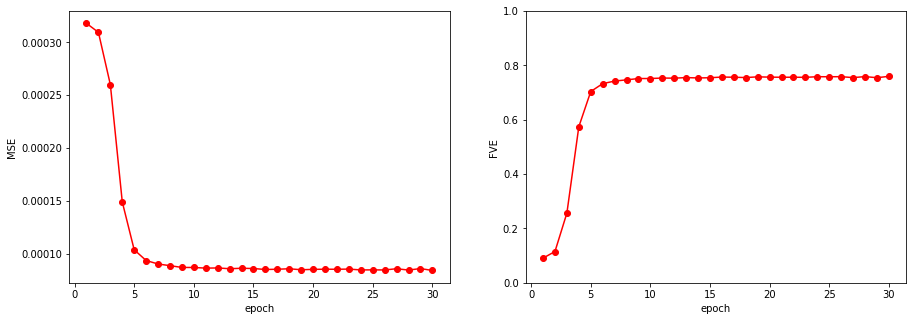

In [37]:
# perform training
loss_train, fve_train = train(ae, dataset)
print("Training complete\n")
# save network
if not os.path.exists('./Net'):
    os.mkdir('./Net')
# saving trained model
save_path = "./Net/ae.pyt"
torch.save(ae.state_dict(), save_path)
save_path = "./Net/encoder.pyt"
torch.save(encoder.state_dict(), save_path)
save_path = "./Net/decoder.pyt"
torch.save(decoder.state_dict(), save_path)
# plot error and fve
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(np.arange(len(loss_train)) + 1, loss_train, 'r-o')
axs[1].plot(np.arange(len(fve_train)) + 1, fve_train, 'r-o')
axs[1].set_ylim(0,1)
axs[0].set_xlabel('epoch')
axs[1].set_xlabel('epoch')
axs[0].set_ylabel('MSE')
axs[1].set_ylabel('FVE')
plt.show()

# Reduce dimensionality

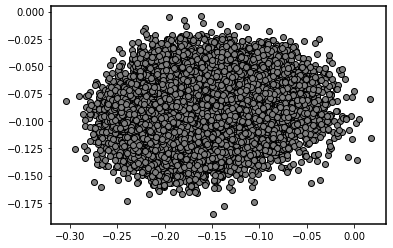

In [39]:
# load encoder
#encoder = Encoder(d, 5*d, c)
#encoder.load_state_dict(torch.load('./Net/encoder.pyt'))

# project data onto low-dimensional space
proj = encoder(get_var_from_np(dataset))
proj = proj.detach().numpy()

# plot projection
x = proj[:,0]
y = proj[:,1]
fig = plt.figure()
ax = fig.add_subplot(111)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
plt.scatter(x, y, c= 'grey', edgecolors= 'black')
# plt.xticks([])
# plt.yticks([])
plt.show()
